# Will I find a job after college and what will my salary be worth: Understanding Inflation and Unemployment

### Content for Today
* [Inflation and Why It Matters](#Inflation-and-Why-It-Matters)
* [Unemployment and Why It Matters](#Unemployment-and-Why-It-Matters)
* [Inflation and Unemployment Relationship](#Unemployment-and-Why-It-Matters)
    * [Phillips Curve](#Phillips-curve)
    * [Federal Reserve and Dual Mandate](#Federal-Reserve-Bank-and-Dual-Mandate)
* [Data Deep Dive](#Data-Deep-Dive)
    * [Visualizing the Relationship](#Visualizing-the-Relationship)
    * [1970s and Stagflation](#1970s-and-Stagflation)
    * [Where we Stand Today](#Given-Historically-Low-Unemployment-Today-Why-Is-Inflation-So-Low?)
* [Positioning for Wage Inflation: Structuring a Trade](#Positioning-for-Wage-Inflation:-Structuring-a-Trade)
* [Questions + Stay in Touch](#Stay-in-Touch)

## Inflation and Why It Matters

* Inflation is the rate at which the general level of prices for goods and services is rising and, consequently, the purchasing power of currency is falling.
* Those with tangible assets, like property or stocked commodities, may like to see some inflation as that raises the value of their assets.
* People holding cash may not like inflation, as it erodes the value of their cash holdings.
* Ideally, an optimum level of inflation is required to promote spending to a certain extent instead of saving, thereby nurturing economic growth.

Source: [Link](https://www.investopedia.com/terms/i/inflation.asp)

While five-digit, Venezuelan-grade inflation is destructive, a little bit greases the wheels of commerce. It makes it easier for companies to give stealth pay cuts to underperformers, because keeping their pay flat is tantamount to a reduction in real wages. Some inflation is also useful to central banks because it helps them fight recessions. To spur borrowing, they like to cut their policy rates to well below the rate of inflation. But they have no room to do so if the rate is barely above zero. A surprise decline in inflation also punishes borrowers by making their debts more burdensome. 

Source: ([Link](https://www.bloomberg.com/news/articles/2019-04-17/did-capitalism-kill-inflation))

Two most common indices that track inflation and CPI (consumer price index) and PCE (personal consumption expenditure). 

In [99]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
!pip install gs-quant
from gs_quant.data import Dataset
from gs_quant.api.fred.data import FredDataApi

In [101]:
# FRED API key, create one here: https://research.stlouisfed.org/docs/api/api_key.html
FRED_API_KEY = 'a6c54519943b6b443ff851c4fe98ed5d'
fred_API = FredDataApi(api_key=FRED_API_KEY)

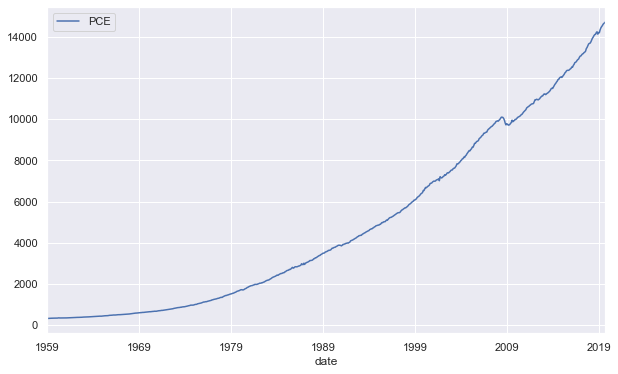

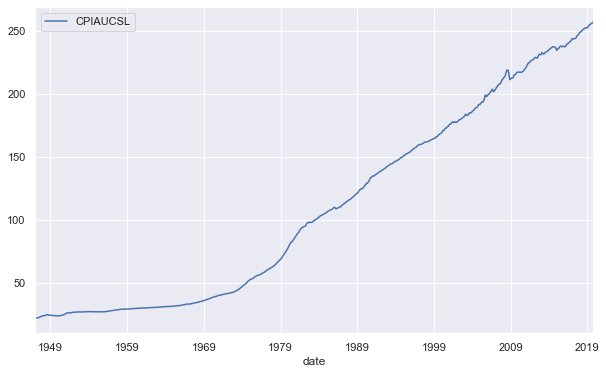

In [102]:
# Pull the personal consumption expenditure data set (https://fred.stlouisfed.org/series/PCE)
PCE_data = Dataset("PCE", fred_API)
PCE = PCE_data.get_data()
# Put consumer price index for all urban consumers (https://fred.stlouisfed.org/series/CPIAUCSL)
CPI_data = Dataset("CPIAUCSL", fred_API)
CPI = CPI_data.get_data()
# Plot
PCE.plot(figsize=(10,6))
CPI.plot(figsize=(10,6))

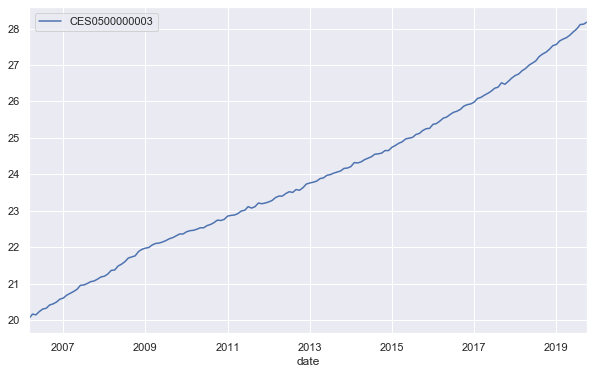

In [103]:
# Pull average hourly earnings data set and visualize (https://fred.stlouisfed.org/series/CES0500000003)
AHE_data = Dataset("CES0500000003", fred_API)
AHE = AHE_data.get_data()
AHE.plot(figsize=(10,6))

### Unemployment and Why It Matters
* Unemployment occurs when workers who want to work are unable to find jobs, which means lower economic output, while still requiring subsistence.
* High rates of unemployment are a signal of economic distress, but extremely low rates of unemployment may signal an overheated economy.
* More unemployed workers mean less total economic production will take place than might have otherwise.

Source: [Link](https://www.investopedia.com/terms/u/unemployment.asp)

To look at unemployment, we will look at number of unemployed at percentage of the labor force.

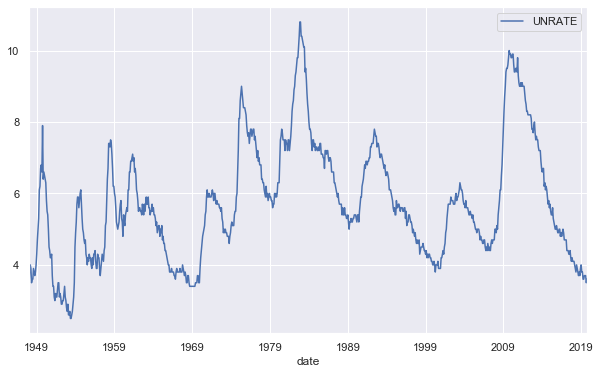

In [104]:
# Pull unemployment rate data set and visualize (https://fred.stlouisfed.org/series/UNRATE)
UN_data = Dataset("UNRATE", fred_API)
UN = UN_data.get_data()
UN.plot(figsize=(10,6))

## Inflation and Unemployment Relationship

When unemployment is low the pool of unemployed workers subsequently decreases and companies increase wages to compete and attract a smaller talent pool. The corporate cost of wages increases and companies pass along those costs to consumers in the form of price increases. When unemployment is high, works are afraid of losing their jobs and put less pressure on employers to raise wages.

Source: [Link](https://www.investopedia.com/terms/p/phillipscurve.asp)

### Phillips curve

The Phillips curve is an economic concept developed by A. W. Phillips stating that inflation and unemployment have a stable and inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

Source: [Link](https://www.investopedia.com/terms/p/phillipscurve.asp)

<img src="https://www.economicshelp.org/wp-content/uploads/2013/02/phillips-curve.png" width="400">

### Federal Reserve Bank and Dual Mandate
Since 1977, the Federal Reserve has operated under a mandate from Congress to "promote effectively the goals of maximum employment, stable prices, and moderate long term interest rates" — what is now commonly referred to as the Fed's "dual mandate." The idea that the Fed should pursue multiple goals can be traced back to at least the 1940s, however, with shifting emphasis on which objective should be paramount. 

Source: [Link](https://www.richmondfed.org/publications/research/economic_brief/2011/eb_11-12)

## Data Deep Dive

In [105]:
data = pd.concat([PCE,AHE,UN,CPI],axis=1)
data.columns = ['PCE', 'AHE', 'UN','CPI']
data.head()

,PCE,AHE,UN,CPI
date,,,,
1947-01-01,NaN,NaN,NaN,21.48
1947-02-01,NaN,NaN,NaN,21.62
1947-03-01,NaN,NaN,NaN,22.00
1947-04-01,NaN,NaN,NaN,22.00
1947-05-01,NaN,NaN,NaN,21.95


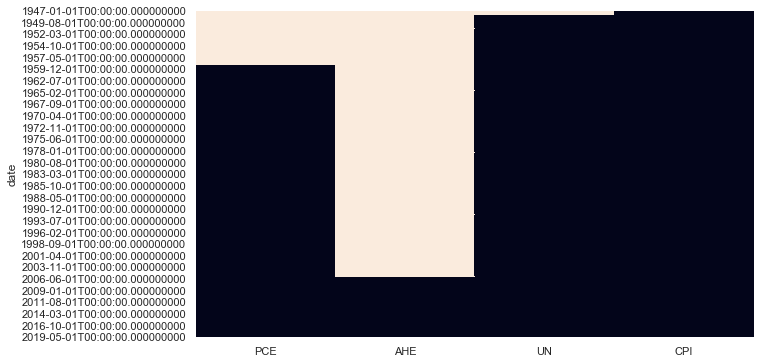

In [106]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
# visually examine where the data gaps are using a heatmap
sns.heatmap(data.isnull(), cbar=False) 

In [75]:
data = data[['UN','PCE']] # focus on unemployment and PCE
data.dropna(inplace=True) # remove missing values
data.head()

,UN,PCE
date,,
1959-01-01,6.0,306.1
1959-02-01,5.9,309.6
1959-03-01,5.6,312.7
1959-04-01,5.2,312.2
1959-05-01,5.1,316.1


In [76]:
from gs_quant.timeseries import returns
# Mind the units - PCE is a level but Phillips curve talks about rates - let's convert
data['PCE_YOY'] = returns(data.PCE,12)*100 # 12 months in a year

### Visualizing the Relationship 

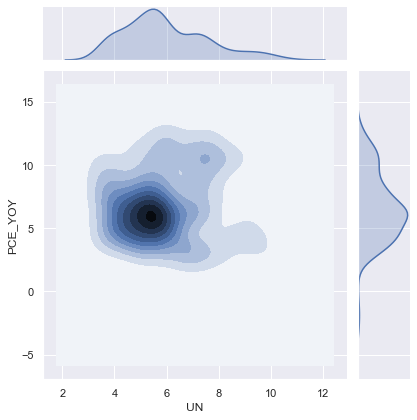

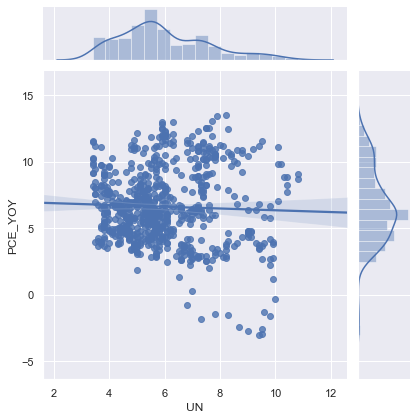

In [85]:
sns.jointplot('UN', 'PCE_YOY',data=data, kind='kde') # kernel density estimation
sns.jointplot('UN', 'PCE_YOY',data=data, kind='reg') # regression

In [90]:
from datetime import datetime
def label_period(row):
    row_date = row.name 
    if row_date < datetime.strptime('1970-01-01', '%Y-%m-%d'):
        return '60s'
    if row_date < datetime.strptime('1980-01-01', '%Y-%m-%d'):
        return '70s'
    if row_date < datetime.strptime('1990-01-01', '%Y-%m-%d'):
        return '80s'
    if row_date < datetime.strptime('2000-01-01', '%Y-%m-%d'):
        return '90s'
    if row_date < datetime.strptime('2007-07-01', '%Y-%m-%d'):
        return '00s precrisis'
    if row_date < datetime.strptime('2009-03-01', '%Y-%m-%d'):
        return 'gfc'
    else:
        return 'recent history'
        
data['period'] = data.apply(label_period,axis=1) # divide data into decades, separating out global financial crisis

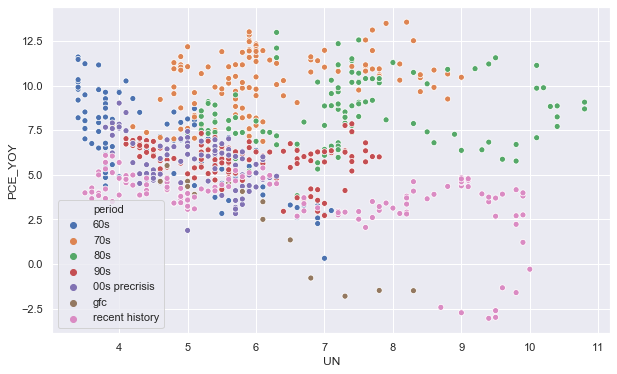

In [91]:
sns.scatterplot(x='UN', y='PCE_YOY',data=data, hue='period') # scatter and color by period

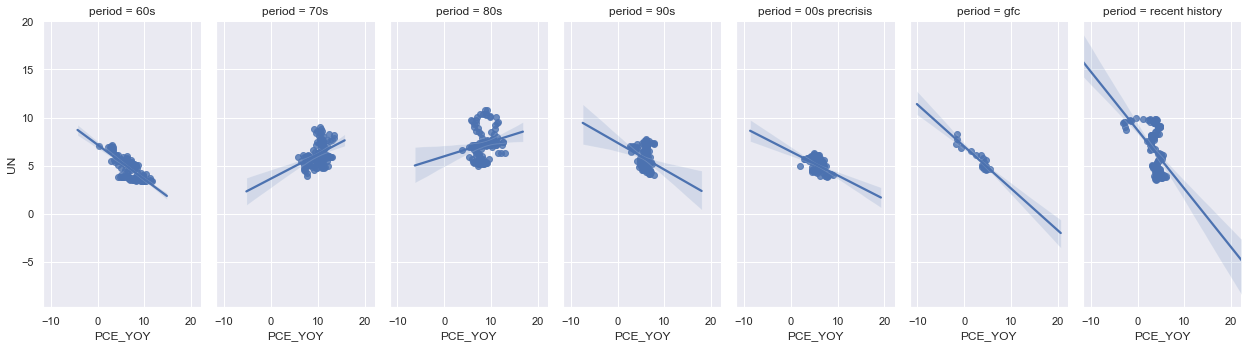

In [92]:
# look at linear models over the period
sns.lmplot(x="PCE_YOY", y="UN", col="period", data=data, aspect=.5)

### 1970s and Stagflation
Stagflation occurs when an economy experiences stagnant economic growth, high unemployment and high price inflation. This scenario, of course, directly contradicts the theory behind the Philips curve. The United States never experienced stagflation until the 1970s, when rising unemployment did not coincide with declining inflation. 

Among possible explanations...
* One theory states that this economic phenomenon is caused when a sudden increase in the cost of oil reduces an economy's productive capacity. In October 1973, the Organization of Petroleum Exporting Countries (OPEC) issued an embargo against Western countries. This caused the global price of oil to rise dramatically, therefore increasing the costs of goods and contributing to a rise in unemployment. Because transportation costs rise, producing products and getting them to shelves got more expensive and prices rose even as people got laid off. 
* Harsh regulation of markets, goods and labor in an otherwise inflationary environment are cited as the possible cause of stagflation.
* Removing last vestiges of the gold standard -  this removed commodity backing for the currency and put the U.S. dollar and most other world currencies on fiat basis ever since then, ending most practical constraint on the monetary expansion and currency devaluation. 

Source: [Link](https://www.investopedia.com/terms/p/phillipscurve.asp)

### Given Historically Low Unemployment Today Why Is Inflation So Low?

Researchers are finding that low inflation is in large part a consequence of globalization or automation or deunionization—or a combination of all three—which undermine workers’ power to bargain for higher wages.

Source: [Link](https://www.bloomberg.com/news/articles/2019-04-17/did-capitalism-kill-inflation)

<img src="https://www.chicagofed.org/~/media/images/research/dual-mandate/bullseye-simple-png.png" width="400">

## Positioning for Wage Inflation: Structuring a Trade

Example trade thesis: If unemployment keeps going lower, there should be pressure on wages to rise. Margins of firms with low labor costs are less exposed to rising wages and should outperform stocks with high labor costs during periods of accelerating wage growth.

In [97]:
import datetime as dt
from datetime import timedelta
from gs_quant.api.gs.assets import GsAssetApi

In [98]:
endDate = dt.datetime.today()
startDate = endDate - timedelta(days=1)

In [8]:
# Get S&P 500 composition
resp = GsAssetApi.get_asset_positions_data('MA4B66MW5E27U8P32SB',startDate, endDate, ['ticker','name','marketCap','netWeight','assetClassificationsGicsSector'])
comp_data = pd.DataFrame(resp)
comp_data.head()

,assetClassificationsGicsSector,assetId,divisor,marketCap,name,netWeight,positionDate,positionType,quantity,ticker,underlyingAssetId
0,Real Estate,MA4B66MW5E27U8P32SB,8.308887e+09,2.674724e+10,Sba Communications Corp,0.001025,2019-11-28,close,0.013613,SBAC,MA4B66MW5E27UAMMMH7
1,Energy,MA4B66MW5E27U8P32SB,8.308887e+09,4.468776e+10,Kinder Morgan Inc,0.001466,2019-11-28,close,0.234312,KMI,MA4B66MW5E27UAKNZHN
2,Energy,MA4B66MW5E27U8P32SB,8.308887e+09,8.440697e+09,Hollyfrontier Corp,0.000302,2019-11-28,close,0.018223,HFC,MA4B66MW5E27UAHKGS3
3,Financials,MA4B66MW5E27U8P32SB,8.308887e+09,2.200829e+10,M & T Bank Corp,0.000851,2019-11-28,close,0.016087,MTB,MA4B66MW5E27UAL9SY2
4,Financials,MA4B66MW5E27U8P32SB,8.308887e+09,3.775584e+10,Prudential Financial Inc,0.001441,2019-11-28,close,0.048382,PRU,MA4B66MW5E27UAM2ULM


In [9]:
# Grab Labor Data
labor_data = pd.read_csv('labor_data.csv')
labor_data.head()

,ticker,industry,implied_labor_cost_as_%_of_rev,median_compensation,number_of_employees,revenue
0,A,Life Sciences Tools & Services,20.65,68579.0,14800.0,4914.00
1,AAL,Airlines,17.81,61527.0,128900.0,44541.00
2,AAN,Specialty Retail,9.52,30904.0,11800.0,3828.92
3,AAOI,Communications Equipment,23.67,21421.0,2956.0,267.47
4,AAON,Building Products,23.98,46852.0,2221.0,433.95


In [10]:
# Join on Ticker
data = pd.merge(left=comp_data,right=labor_data, how='left', left_on='ticker', right_on='ticker')
# Drop The Nulls - In Actuality Need to Better Deal with Missing Data
data.dropna(subset=['implied_labor_cost_as_%_of_rev'], inplace=True)
data.describe()

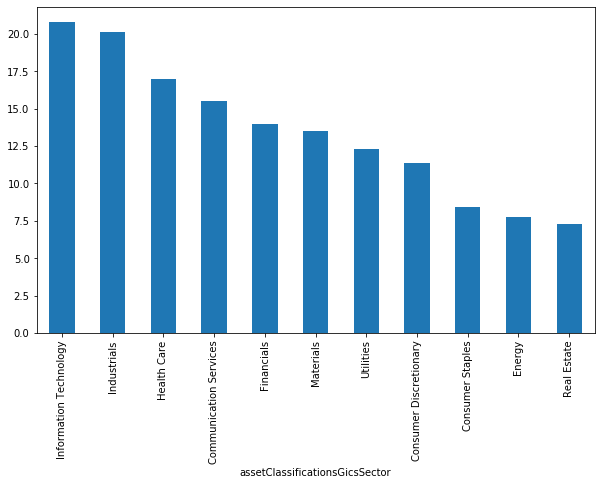

In [46]:
data.groupby(['assetClassificationsGicsSector'])['implied_labor_cost_as_%_of_rev'].mean().sort_values(ascending=False).plot.bar(figsize=(10,6))

One simple implementation could be to buy the sector with the highest labor cost and sell with the lowest...BUT there are many other factors to potentially consider and analyze!

# Stay in Touch

<img src="Check-in.PNG" width="1000">